In [1]:
import numpy as np # linear algebra
import scipy as sp 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#read in
pd_data = pd.read_csv('Reviews.csv')
#For this homework, please use the first 10000 rows
pd_data = pd_data[:10000]
pd_data.shape

(10000, 10)

In [3]:
#pd_data.head()

In [4]:
#Top-10 Reviewer
#Sort by number of reviews ("UserId")
userid=pd_data.groupby("UserId")
userid_sort_10=userid.size().sort_values(ascending=False).head(10)
userid_sort_10

UserId
A1Z54EM24Y40LL    17
A2SZLNSI5KOQJT    10
A35R32TA60XD57     9
A281NPSIMI1C2R     8
A3OXHLG6DIBRW8     7
A3NHUQ33CFH3VM     7
A3PJZ8TU8FDQ1K     7
A3TX6CWSZL02PW     6
AQQLWCMRNDFGI      6
A2R6RA8FRBS608     6
dtype: int64

In [5]:
#new DataFrame to show answer
new=pd.DataFrame(columns=['UserId','ProfileName','Scorecount','score mean'])

In [6]:
for i in range(10):
    ppl=userid_sort_10.index[i]  #UserId
    data=userid.get_group(ppl)   #get group
    new_row={'UserId':[ppl],
                'ProfileName':[data.iloc[0,3]],
                'Scorecount':[userid_sort_10[i]],
                'score mean':[data.mean()[3]]}     #one's data
    add=pd.DataFrame(new_row)    #turn to dataframe
    new=new.append(add)          #append


In [7]:
#1.Answer
new.reset_index()

,index,UserId,ProfileName,Scorecount,score mean
0,0,A1Z54EM24Y40LL,c2,17,3.882353
1,0,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
2,0,A35R32TA60XD57,M. Torma,9,4.111111
3,0,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
4,0,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
5,0,A3NHUQ33CFH3VM,Citizen John,7,3.142857
6,0,A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
7,0,A3TX6CWSZL02PW,"LaVerne "":LaVerne""",6,5.000000
8,0,AQQLWCMRNDFGI,Steven A. Peterson,6,4.166667
9,0,A2R6RA8FRBS608,Matthew G. Sherwin,6,5.000000


In [8]:
#2. Plot score distribution for the user with the most number of reviews
first=userid_sort_10.index[0]  #userid with the most number of reviews
first_data=userid.get_group(first)     #user
first_score=first_data["Score"]

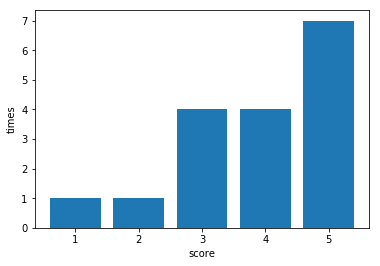

In [9]:
plt.bar(first_score.value_counts().index,first_score.value_counts())
plt.xlabel('score')
plt.ylabel('times')
#2.Answer
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


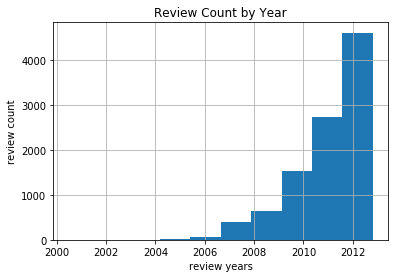

In [10]:
#3. Plot pandas Series DataFrame (Time->Date)
time=pd_data["Time"]
#transfer column "Time" -> Date
pd.to_datetime(time,unit='s').hist()
plt.title('Review Count by Year')
plt.xlabel('review years')
plt.ylabel('review count')
#3.Answer
plt.show()


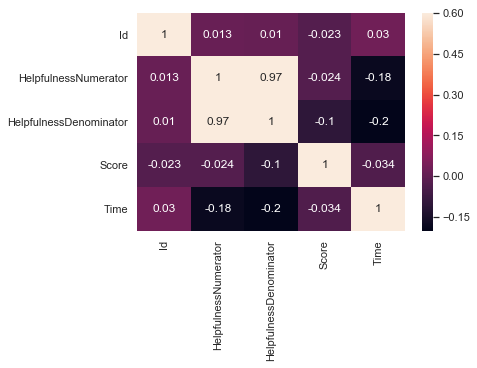

In [11]:
#4. Plot HeatMap using seaborn
sns.set()
#Correlation between numeric features (Id, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time)
heat_data=pd_data[['Id','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time']]
corrmat = heat_data.corr()
ax=sns.heatmap(corrmat,annot=True,vmax=0.6,vmin=-0.2)

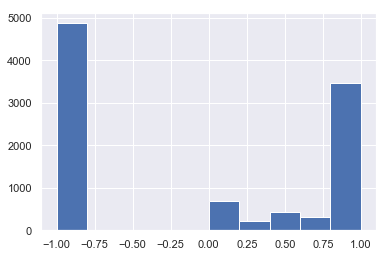

In [12]:
#5. Helpful percent
H=pd_data#[['HelpfulnessNumerator','HelpfulnessDenominator']]
#hd=pd_data['HelpfulnessDenominator']
def weird_division(n, d):
    if d>0:
        return n/d
    else:
        return -1
def get(df):
    hn=df['HelpfulnessNumerator']
    hd=df['HelpfulnessDenominator']
    result=weird_division(hn, hd)
    return result
    
helpful_data= H.apply(get,axis=1)
helpful_data.hist(bins=10)
plt.show()